In [15]:
%pip install pandas matplotlib seaborn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


### Data Cleaning and Preparation

In [16]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv('../data/netflix_titles.csv')

# 2. Handle missing values as per guidelines
# We fill critical columns with 'Unknown' instead of deleting them
df['country'] = df['country'].fillna('Unknown')
df['director'] = df['director'].fillna('No Director')
df['cast'] = df['cast'].fillna('No Cast')

# 3. Convert date_added to datetime format
# The .str.strip() ensures there is no accidental whitespace
df['date_added'] = pd.to_datetime(df['date_added'].str.strip())

# 4. Extract year information from date_added
# We drop the few rows where date_added is missing to ensure we have clean years
df.dropna(subset=['date_added'], inplace=True)
df['year_added'] = df['date_added'].dt.year.astype(int)

# 5. Process multi-value fields (country and listed_in)
# This 'explodes' the lists so we can count individual genres/countries later
df['genre_list'] = df['listed_in'].str.split(', ')
df_exploded = df.explode('genre_list')

# Show the first 5 rows to verify it worked
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,genre_list,content_age,is_mature
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,No Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,[Documentaries],1,False
1,s2,TV Show,Blood & Water,No Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,"[International TV Shows, TV Dramas, TV Mysteries]",0,True
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,"[Crime TV Shows, International TV Shows, TV Ac...",0,True
3,s4,TV Show,Jailbirds New Orleans,No Director,No Cast,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,"[Docuseries, Reality TV]",0,True
4,s5,TV Show,Kota Factory,No Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,"[International TV Shows, Romantic TV Shows, TV...",0,True


### Feature Engineering

In [17]:
# Step 2: Feature Engineering
# Content Age = Year Added - Release Year

df['content_age'] = df['year_added'] - df['release_year']

# This line gives you a quick statistical summary
print(f"Average age of content when added: {df['content_age'].mean():.2f} years")

# Show the first few rows to see the new column
df[['title', 'release_year', 'year_added', 'content_age']].head()

Average age of content when added: 4.69 years


,title,release_year,year_added,content_age
0,Dick Johnson Is Dead,2020,2021,1
1,Blood & Water,2021,2021,0
2,Ganglands,2021,2021,0
3,Jailbirds New Orleans,2021,2021,0
4,Kota Factory,2021,2021,0


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

#### Question 01: distribution of Movies versus TV Shows on Netflix

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20336\151386943.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='Set2')


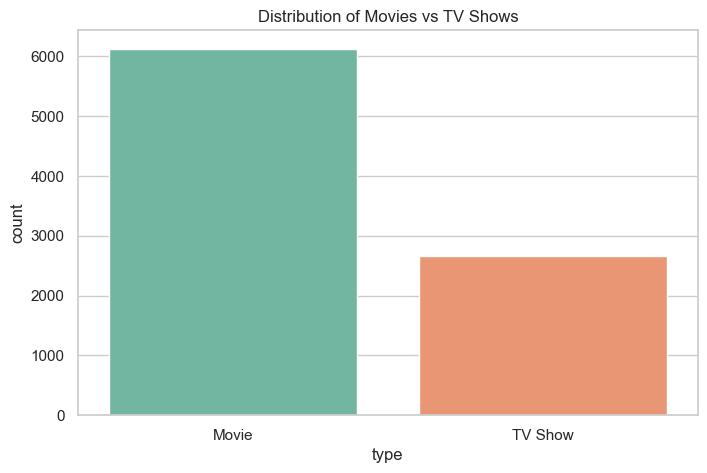

Counts:
type
Movie      6131
TV Show    2666
Name: count, dtype: int64

Percentages:
type
Movie      69.694214
TV Show    30.305786
Name: proportion, dtype: float64


In [19]:
# Distribution plot...Question 01
plt.figure(figsize=(8, 5))
sns.countplot(x='type', data=df, palette='Set2')
plt.title('Distribution of Movies vs TV Shows')
plt.show()

# Exact counts and percentages
counts = df['type'].value_counts()
percent = df['type'].value_counts(normalize=True) * 100
print(f"Counts:\n{counts}\n\nPercentages:\n{percent}")

#### **Analysis: Movies vs. TV Shows**
Movies make up about 70% of the library, while TV shows account for the remaining 30%. While movies are more numerous, they are usually one-time watches. Netflix has been shifting its focus toward TV shows because they are better for keeping people subscribed. A viewer might spend two hours on a movie, but they could spend fifty hours on a series with many seasons. This keeps people paying for their subscription month after month.


#### Question 02: top 10 countries producing the most Netflix content

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20336\376749499.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


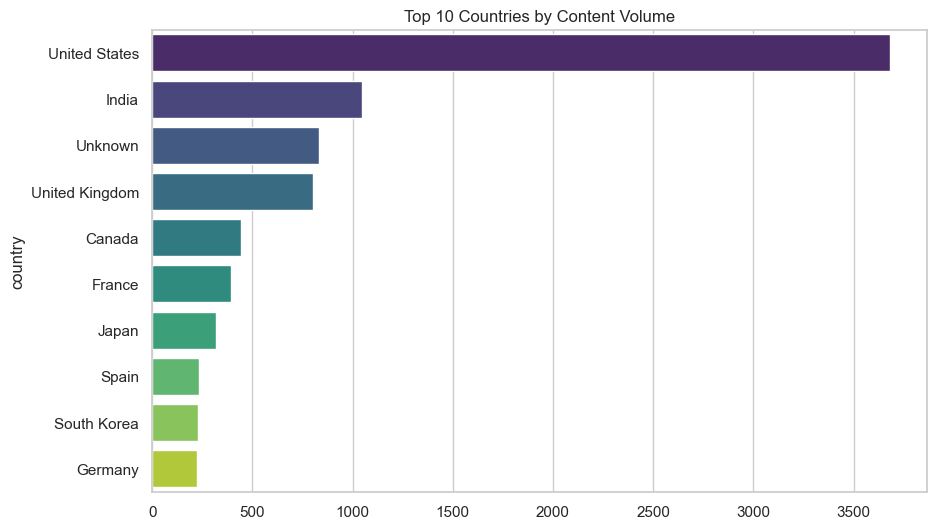

In [20]:
df_countries = df[['country']].copy()
df_countries['country'] = df['country'].str.split(', ')
df_countries = df_countries.explode('country').reset_index(drop=True)

top_countries = df_countries['country'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Content Volume')
plt.show()

#### **Analysis: Leading Producers**
The United States is the clear leader, followed by India and the United Kingdom. Netflix started as a US company, so the heavy American presence makes sense. However, the high rank of India and the UK shows that Netflix is successfully becoming a global player. They aren't just sending Hollywood films to the world. They're creating local content to win over different markets.

#### Question 03: number of titles added to Netflix changed over the years

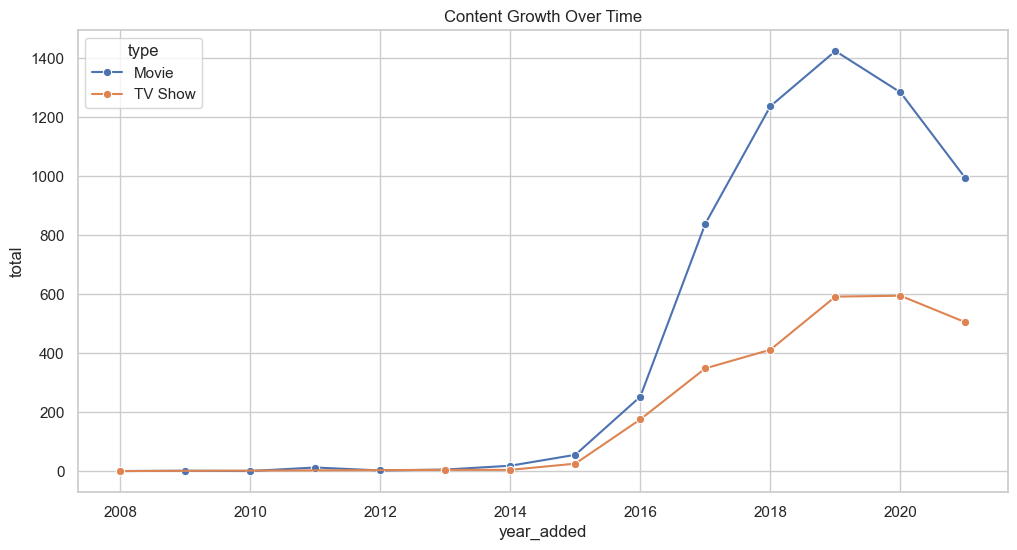

In [21]:
yearly_counts = df.groupby(['year_added', 'type']).size().reset_index(name='total')
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts, x='year_added', y='total', hue='type', marker="o")
plt.title('Content Growth Over Time')
plt.grid(True)
plt.show()

#### **Analysis: Library Expansion**
There was a massive explosion in content starting in 2016. It peaked around 2019, with a small dip in 2020. This shows the "streaming wars" in action. Around 2016, Netflix started spending billions of dollars to build a massive library before competitors like Disney+ could launch. The dip in 2020 was likely because of production shutdowns during the pandemic.

#### Question 04: content ratings on Netflix

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20336\3402091510.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')


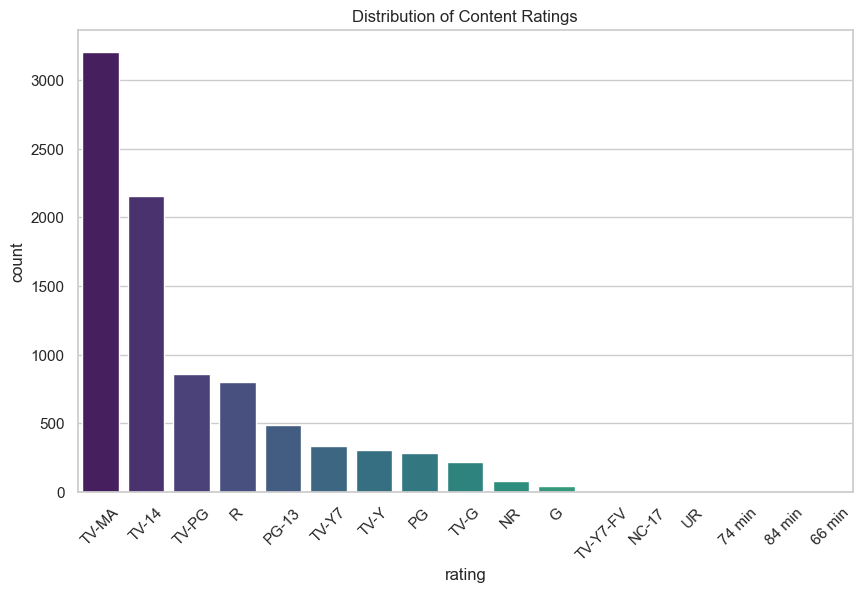

In [22]:
plt.figure(figsize=(10, 6))
# We count each rating and plot it
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index, palette='viridis')
plt.title('Distribution of Content Ratings')
plt.xticks(rotation=45)
plt.show()

#### **Analysis: Target Audience**
TV-MA is the most common rating on the platform, followed by TV-14. Netflix isn't a "kids-first" platform like Disney+. By focusing on mature content, they're targeting adults who have the most money to spend on subscriptions. They've positioned themselves as the home for prestige dramas like *Stranger Things* or *The Crown*.

#### Question 05: most frequently occurring genres in the Netflix catalog

C:\Users\Administrator\AppData\Local\Temp\ipykernel_20336\2820420584.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')


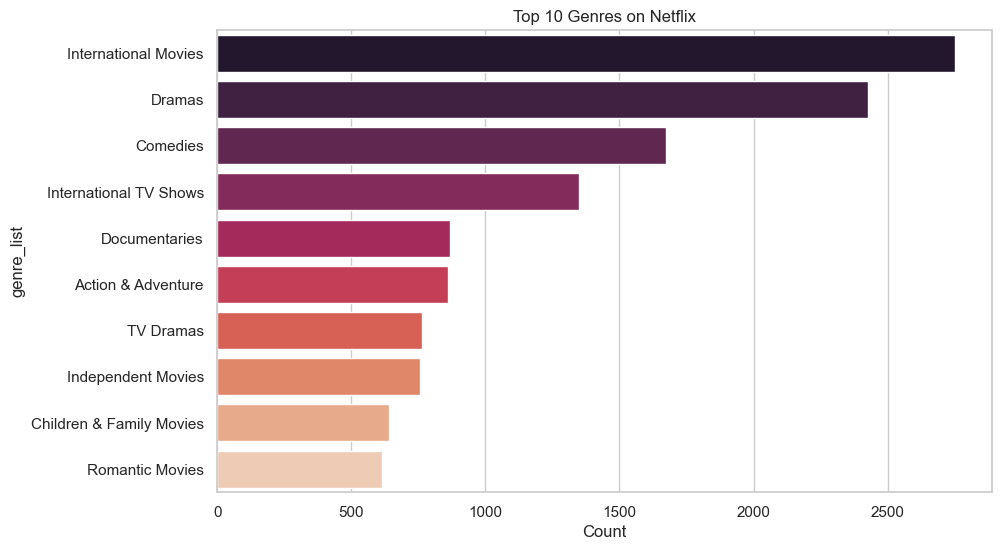

In [23]:
top_genres = df_exploded['genre_list'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='rocket')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.show()

#### **Analysis: Popular Categories**
International Movies, Dramas, and Comedies are the top three categories. The popularity of international movies is a major insight. It proves that Netflix's biggest growth isn't just in the US anymore. They use their platform to move content across borders, like making a Spanish show a hit in the United States.

### Question 06: Compare average age for Movies vs TV Shows

Average Content Age (Years):
type
Movie      5.727777
TV Show    2.298200
Name: content_age, dtype: float64


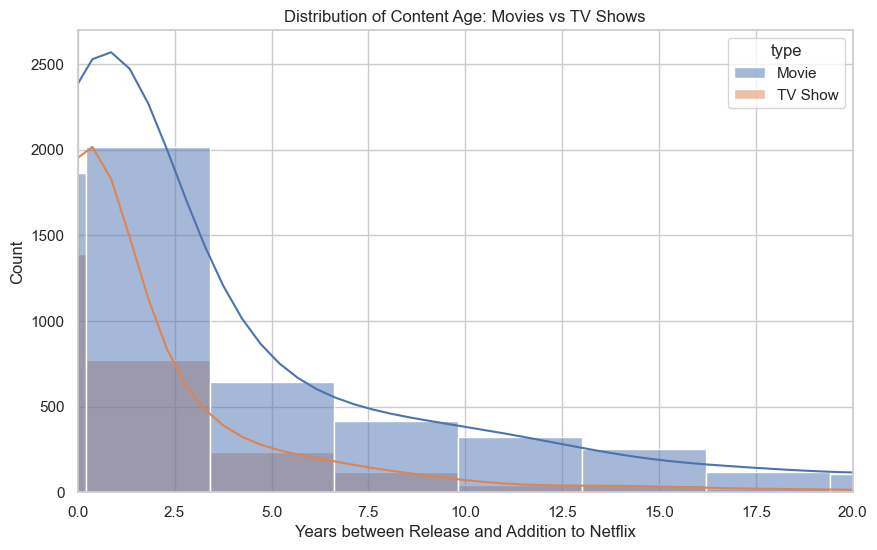

In [24]:
age_comparison = df.groupby('type')['content_age'].mean()
print("Average Content Age (Years):")
print(age_comparison)

# Visualize the distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='content_age', hue='type', kde=True, bins=30)
plt.title('Distribution of Content Age: Movies vs TV Shows')
plt.xlabel('Years between Release and Addition to Netflix')
plt.xlim(0, 20) # Focusing on the last 20 years for clarity
plt.show()

#### **Analysis: Freshness vs. Library**
Most content is added to Netflix within 1 or 2 years of its original release. This shows that Netflix has moved away from being a place for old movies. They want to be seen as the place for "the new thing." This strategy is expensive, but it's necessary to compete with movie theaters and cable TV.

### Question 7: Genre Diversity Analysis

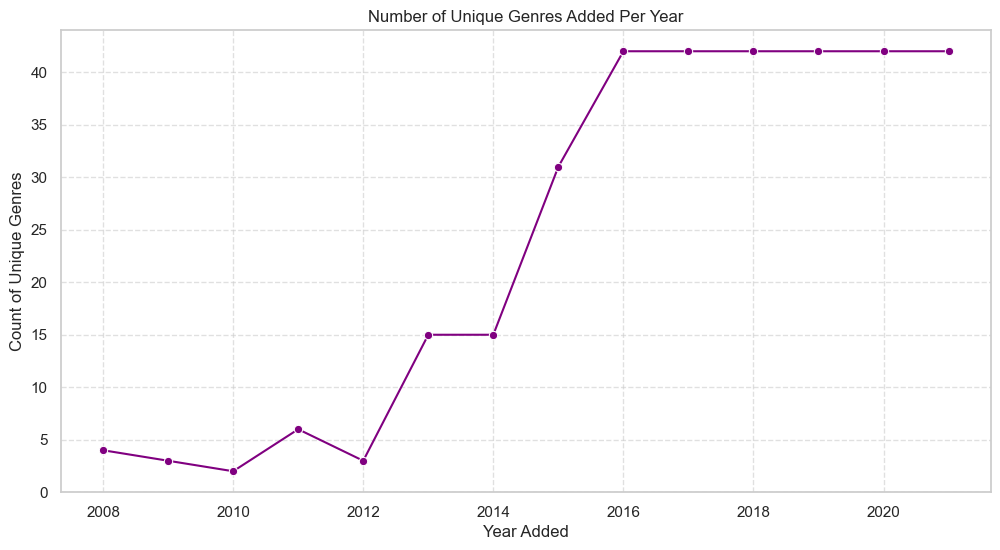

In [25]:
# Count unique genres added each year
genre_diversity = df_exploded.groupby('year_added')['genre_list'].nunique()

plt.figure(figsize=(12, 6))
sns.lineplot(x=genre_diversity.index, y=genre_diversity.values, marker='o', color='purple')
plt.title('Number of Unique Genres Added Per Year')
plt.ylabel('Count of Unique Genres')
plt.xlabel('Year Added')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### **Analysis: Niche Targeting**
The number of unique genres has increased significantly over the last five years. Netflix is getting better at targeting specific interests. Instead of just having "Action," they now have categories like "Cyberpunk Anime" or "Spanish Thrillers." This helps them keep very specific groups of fans happy.

### Question 8: Country Dependency

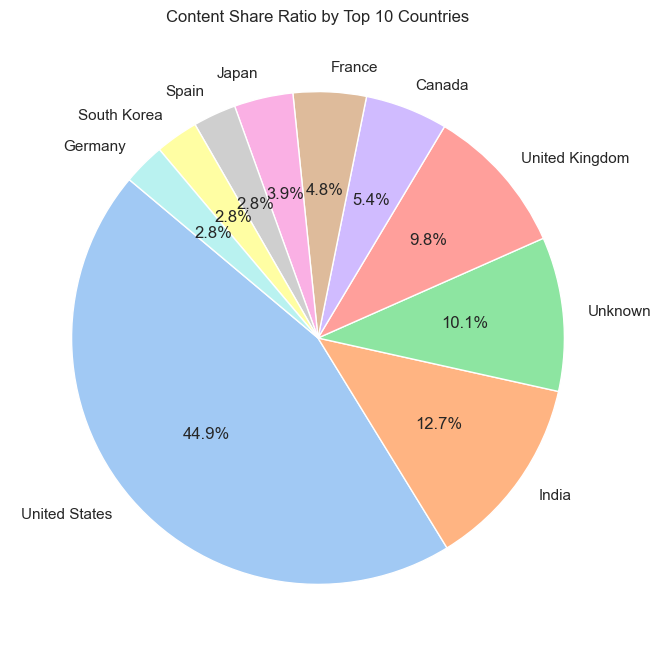

Percentage Share for Top Countries:
country
United States     33.991694
India              9.653899
Unknown            7.660360
United Kingdom     7.411168
Canada             4.107060
France             3.627134
Japan              2.925704
Spain              2.141209
South Korea        2.131980
Germany            2.085833
Name: count, dtype: float64


In [26]:
# Calculate the percentage share for each country
country_counts = df_countries['country'].value_counts()
total_entries = country_counts.sum()
country_ratios = (country_counts / total_entries) * 100

# Look at the top 10
top_ratios = country_ratios.head(10)

plt.figure(figsize=(10, 8))
plt.pie(top_ratios, labels=top_ratios.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Content Share Ratio by Top 10 Countries')
plt.show()

print("Percentage Share for Top Countries:")
print(top_ratios)

#### **Analysis: Strategic Risks**
About 40% of the top content still comes from the US. This is a bit of a bottleneck. If the US has a writer or actor strike, nearly half of Netflix’s new content could dry up. To be safe, Netflix needs to keep moving production to other countries to protect itself from local disruptions.

### Question 9: Shift toward Mature Content

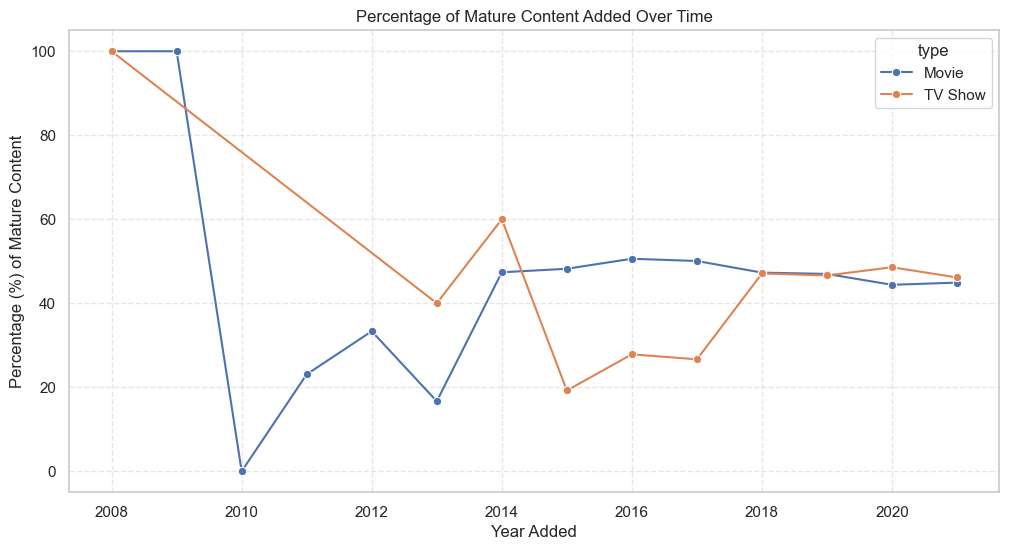

In [27]:
# First, let's define what counts as 'Mature'
mature_ratings = ['TV-MA', 'R', 'NC-17']

# Create a column that is True if mature, and False if not
df['is_mature'] = df['rating'].isin(mature_ratings)

# Group by year and type to see the count of mature titles
mature_trend = df.groupby(['year_added', 'type'])['is_mature'].mean().reset_index()

# Convert to percentage for easier reading
mature_trend['is_mature'] *= 100

plt.figure(figsize=(12, 6))
sns.lineplot(data=mature_trend, x='year_added', y='is_mature', hue='type', marker='o')
plt.title('Percentage of Mature Content Added Over Time')
plt.ylabel('Percentage (%) of Mature Content')
plt.xlabel('Year Added')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

#### **Analysis: The "Adult" Pivot**
Since 2015, the percentage of mature content added each year has climbed steadily. Netflix has grown up with its audience. Early on, they had more family-friendly licensed content. Now, they're investing heavily in edgier, adult-oriented originals. This helps them stand out from competitors who focus on younger audiences.

In [28]:
# Save the cleaned and feature-engineered data to a new CSV file
# index=False ensures we don't add an extra 'Unnamed: 0' column to our data
df.to_csv('../data/netflix_titles.csv', index=False)

print("Success! Your cleaned dataset is saved as 'netflix_cleaned_dataset.csv'.")

Success! Your cleaned dataset is saved as 'netflix_cleaned_dataset.csv'.


### **Question 10: Final Strategic Conclusion**
Netflix is a global powerhouse that's increasingly focused on mature, high-engagement TV series produced outside the US.

**The Main Finding:**
The library is shifting from a US-centric movie collection to a global, TV-heavy platform. Their focus on "fresh" content (added shortly after release) shows they are competing for current cultural relevance.

**The Strategic Risk:**
Their biggest risk is "Licensing Flight." As companies like Disney or Paramount take their famous movies back for their own apps, Netflix is forced to spend more on originals. If their original shows aren't hits, they lose their library. They must continue to gamble on high-quality, international original content to survive.